###### Whatsapp Chat Analysis Using NLP
 
Both Individual Chat and Group Chat

#### Vedant Tripathi (2018IMG-070)

### Import all neccesary libraries.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook
from dateutil import parser
import datetime
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('nps_chat')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
from profanity_check import predict, predict_prob
from textblob import TextBlob
import emoji
import itertools 
import matplotlib.style as style
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
from collections import Counter

style.use('ggplot')



%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


<BR>
<BR>
    
## DATA REFINING
<BR>
<BR>
    
### Function to check date and valid user name..

In [62]:
def validDate(text):
    try:
        datetime.datetime.strptime(text, '%d/%m/%Y')
        return True
    except Exception as e:
      return False

In [63]:
def validUser(str):
  if len(str.split(' ')) < 5 and not 'left' in str and not 'added' in str and not 'removed' in str and not 'admin' in str and not 'You created' in str:
    return True
  return False

<BR>
<BR>

### Reading the chat and Preprocessing

In [64]:
lines = []
ppl=defaultdict(list)
        
with open('SampleChat1.txt', encoding='utf8') as f:
    for line in f:
        if validDate(line.split(',')[0]):
            lines.append(line.strip('\n'))
        else:
            lines[len(lines) - 1] += ' ' + line.strip('\n')
  

datetimes, names, msgs = ([] for i in range(3))
for line in tqdm_notebook(lines, total = len(lines), unit = 'line'):
    datetimes.append(datetime.datetime.strptime(line.split('-')[0], '%d/%m/%Y, %H:%M '))
    names.append(line.split('-')[1].split(':')[0].strip())
    msgs.append(''.join(line.split('-')[1].split(':')[1:]))
    person = line.split('-')[1].split(':')[0].strip()
    if validUser(person) :
        text = nltk.sent_tokenize(''.join(line.split('-')[1].split(':')[1:]))
        ppl[person].extend(text)

df = pd.DataFrame()
df['datetime'] = datetimes
df['name'] = names
df['msg'] = msgs
df = df[df['name'].apply(validUser)]

<BR>
<BR>
    
### Extracting Date and Time

In [65]:
df['date'] = df['datetime'].apply(lambda x: x.date())
df['day_sent'] = df['datetime'].dt.strftime('%a')
df['month_sent'] = df['datetime'].dt.strftime('%b')
df['year_sent'] = df['datetime'].dt.year
df['count'] = 1 
df = df[~df['msg'].apply(lambda x: True if '\xa0' in x else False)]

<BR>
<BR>
    
### Now Data Looks Like This

In [66]:
df

,datetime,name,msg,date,day_sent,month_sent,year_sent,count
3,2019-11-07 22:53:00,Person2,@918369616043 sir vo youtube cover ki psd 128 mb ki hai yaha send nhi hogi toh png de du chale...,2019-11-07,Thu,Nov,2019,1
4,2019-11-07 23:08:00,Person3,Psds mail kar diya kar...,2019-11-07,Thu,Nov,2019,1
5,2019-11-07 23:08:00,Person3,Yaha png bhej de,2019-11-07,Thu,Nov,2019,1
6,2019-11-07 23:19:00,Person2,Email ?,2019-11-07,Thu,Nov,2019,1
7,2019-11-07 23:26:00,Person2,This message was deleted,2019-11-07,Thu,Nov,2019,1
...,...,...,...,...,...,...,...,...
702,2020-08-15 14:06:00,Person4,It's on him,2020-08-15,Sat,Aug,2020,1
703,2020-08-15 14:07:00,Person5,will do.,2020-08-15,Sat,Aug,2020,1
704,2020-08-15 14:08:00,Person6,god promise,2020-08-15,Sat,Aug,2020,1
705,2020-08-15 14:09:00,Person7,i trust him.,2020-08-15,Sat,Aug,2020,1


In [87]:

ppl

defaultdict(list,
            {'Person2': [' @918369616043  sir vo youtube cover ki psd 128 mb ki hai yaha send nhi hogi toh png de du chalega ?',
              ' Email ?',
              ' This message was deleted',
              ' <Media omitted>',
              ' <Media omitted>',
              ' <Media omitted>',
              ' Sir ye ?',
              ' Ye ?',
              ' <Media omitted>',
              ' corna',
              ' hn',
              ' ok',
              ' <Media omitted>',
              ' <Media omitted>',
              ' Sare event poster mai sir ?',
              'Ya general wale mai ?',
              ' Ok',
              ' <Media omitted>',
              ' <Media omitted>',
              ' 🙋🏻\u200d♂',
              ' Bana hua hai yaha send kr raha',
              ' Sir kal subha send kr deta laptop mai hai vo',
              ' <Media omitted>',
              ' <Media omitted>',
              ' Not possible for me right now',
              ' 🥳🤪🤩',
            

<BR>
<BR>

## EXPLORATORY DATA ANALYSIS

<BR>
    
### Frequency of Messages


Text(0.5, 1.0, 'Messages sent per day over a time period')

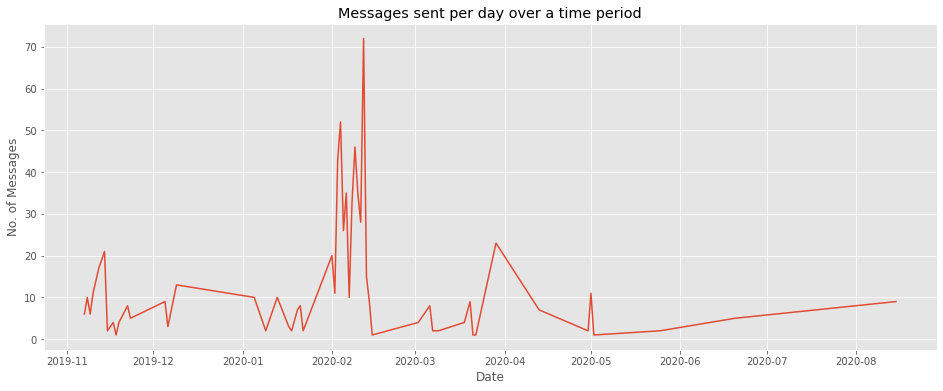

In [73]:
grouped_by_date = df.groupby('date').sum().reset_index()

plt.figure(figsize = (16, 6))
ax = sns.lineplot(x = 'date', y = 'count', data = grouped_by_date)
ax.set(xlabel="Date", ylabel="No. of Messages")
plt.title('Messages sent per day over a time period')

<BR>
<BR>

### Assigning color to users

In [74]:
def getColors(namess):
    order = list(namess)
    return_list = []
    for name in order:
        return_list.append(color_dict[name])
    return return_list

color_dict = {}
colors = ['#0048BA', '#C46210', '#B0BF1A', '#E52B50', '#B284BE', '#FFBF00', '#008000', '#FF91AF', '#568203', '#E9D66B', '#8DB600', '#3D2B1F', '#9F8170', '#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A', '#777777']
names = df['name'].unique()

for name, color in zip(names, colors):
  color_dict[name] = color

color_dict


{'Person2': '#0048BA',
 'Person3': '#C46210',
 'Person8': '#B0BF1A',
 'Person7': '#E52B50',
 'Person6': '#B284BE',
 'Person1': '#FFBF00',
 'Person4': '#008000',
 'Person5': '#FF91AF'}

<BR>
<BR>

### Total number of Messages sent per person

Text(0.5, 1.0, 'Total Messages Sent per Person')

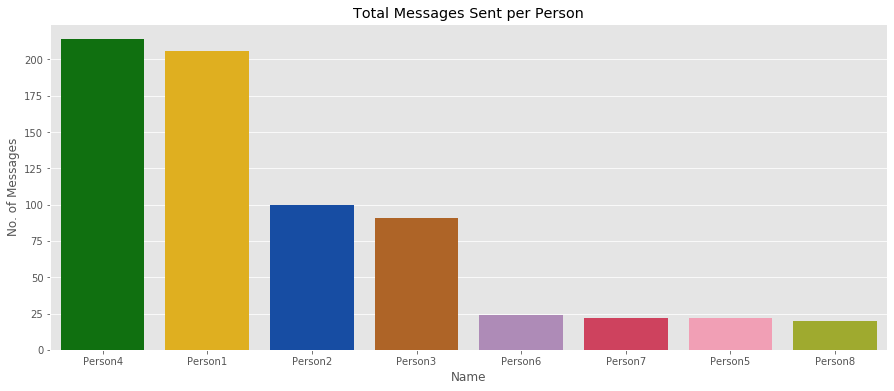

In [134]:
fig, axs = plt.subplots(ncols = 1, figsize = (15, 6))
sns.countplot(x = 'name', data = df, order = df['name'].value_counts().index,  palette = getColors(df['name'].value_counts().index))
axs.set(xlabel="Name", ylabel="No. of Messages")
axs.set_title('Total Messages Sent per Person')




<BR>
<BR>

### Average message length for each person

Text(0.5, 1.0, 'Average Message Lengths')

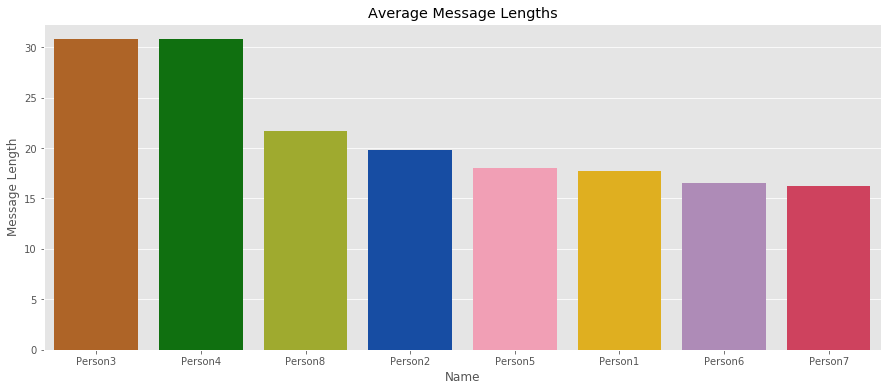

In [135]:
fig, axs = plt.subplots(ncols = 1, figsize = (15, 6))
df['msg_length'] = df['msg'].apply(lambda x: len(x))
avg_msg_lengths = df.groupby('name').mean().reset_index().sort_values(by = 'msg_length', ascending = False)
sns.barplot(x = 'name', y = 'msg_length', data = avg_msg_lengths, palette = getColors(avg_msg_lengths['name']))
axs.set(xlabel="Name", ylabel="Message Length")
axs.set_title('Average Message Lengths')

<BR>
<BR>

### Total Media sent per person

Text(0.5, 1.0, 'Total Media Sent per Person')

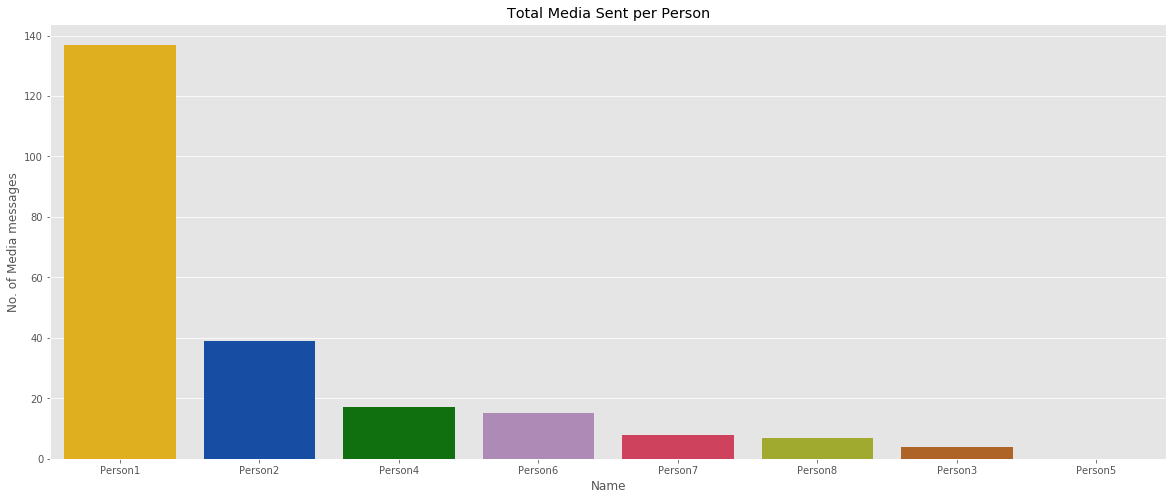

In [137]:
plt.figure(figsize = (20, 8))
df['is_media'] = df['msg'].apply(lambda x: 1 if '<Media omitted>' in x else 0)
df.groupby('name').sum().reset_index().sort_values(by = 'is_media', ascending = False)[['name', 'is_media']]
total_media_count = df.groupby('name').sum().reset_index().sort_values(by = 'is_media', ascending = False)[['name', 'is_media']]
axs=sns.barplot(x = 'name', y = 'is_media', data = total_media_count, palette = getColors(total_media_count['name']))
axs.set(xlabel="Name", ylabel="No. of Media messages")
plt.title('Total Media Sent per Person')


<BR>
<BR>

### Emoji used by each person

Text(0.5, 1.0, 'Total Emojis Used per person')

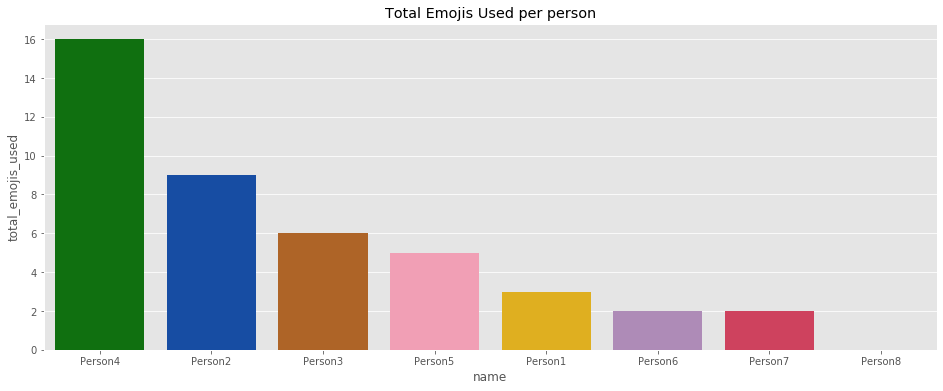

In [83]:
df['emojis'] = df['msg'].apply(lambda x: ''.join(c for c in x if c in emoji.UNICODE_EMOJI['en']))
emoji_df = df[df['emojis'].apply(lambda x: True if x else False)]

emoji_dict = dict.fromkeys(df['name'].unique())
for key in emoji_dict.keys():
  emoji_dict[key] = {}
  for emoji_key in emoji.UNICODE_EMOJI['en'].keys():
    emoji_dict[key][emoji_key] = 0

for name, emojis in zip(emoji_df['name'], emoji_df['emojis']):
  for single_emoji in emojis:
    emoji_dict[name][single_emoji] += 1

for name in df['name'].unique():
  emoji_dict[name] = {k: v for k, v in sorted(emoji_dict[name].items(), key = lambda item: item[1], reverse = True)}

grouped_df = df.groupby('name').sum().reset_index()
grouped_df['most_used_emojis'] = grouped_df['name'].apply(lambda x: dict(itertools.islice(emoji_dict[x].items(), 5)))
grouped_df['total_emojis_used'] = grouped_df['name'].apply(lambda x: sum(emoji_dict[x].values()))
grouped_df = grouped_df.sort_values(by = 'total_emojis_used', ascending = False)
plt.figure(figsize = (16, 6))
sns.barplot(x = 'name', y = 'total_emojis_used', data = grouped_df, palette = getColors(grouped_df['name']))
plt.title('Total Emojis Used per person')


In [84]:
pd.options.display.max_colwidth=100
grouped_df[['name', 'most_used_emojis']]

,name,most_used_emojis
3,Person4,"{'👍': 7, '🏼': 2, '😂': 1, '😅': 1, '💯': 1}"
1,Person2,"{'😅': 2, '🏻': 1, '♂': 1, '🥳': 1, '🙋': 1}"
2,Person3,"{'👍': 3, '🏻': 2, '😅': 1, '🥇': 0, '🥈': 0}"
4,Person5,"{'🏻': 2, '👌': 1, '🤣': 1, '👍': 1, '🥇': 0}"
0,Person1,"{'🥳': 2, '😅': 1, '🥇': 0, '🥈': 0, '🥉': 0}"
5,Person6,"{'👍': 2, '🥇': 0, '🥈': 0, '🥉': 0, '🆎': 0}"
6,Person7,"{'🎉': 2, '🥇': 0, '🥈': 0, '🥉': 0, '🆎': 0}"
7,Person8,"{'🥇': 0, '🥈': 0, '🥉': 0, '🆎': 0, '🏧': 0}"


<BR>
<BR>

### Individual Report of each person

In [47]:
media_messages_df = df[df['msg'] == ' <Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['msg'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['msg'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = df.name.unique()
for i in range(len(l)):
  req_df= messages_df[messages_df["name"] == l[i]]
  print(f'Stats of {l[i]} -')
  print('Messages Sent ==> ', req_df.shape[0])
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message ==> ', words_per_message)
  media = media_messages_df[media_messages_df['name'] == l[i]].shape[0]
  print('Media Messages Sent ==> ', media)
  emojis = sum(req_df['emojis'].str.len())
  print('Total number of emojis ==> ', emojis)
  print()

Stats of Person2 -
Messages Sent ==>  61
Words per message ==>  5.934426229508197
Media Messages Sent ==>  39
Total number of emojis ==>  9

Stats of Person3 -
Messages Sent ==>  87
Words per message ==>  6.747126436781609
Media Messages Sent ==>  4
Total number of emojis ==>  6

Stats of Person8 -
Messages Sent ==>  13
Words per message ==>  5.230769230769231
Media Messages Sent ==>  7
Total number of emojis ==>  0

Stats of Person7 -
Messages Sent ==>  14
Words per message ==>  5.0
Media Messages Sent ==>  8
Total number of emojis ==>  2

Stats of Person6 -
Messages Sent ==>  9
Words per message ==>  4.111111111111111
Media Messages Sent ==>  15
Total number of emojis ==>  2

Stats of Person1 -
Messages Sent ==>  69
Words per message ==>  4.753623188405797
Media Messages Sent ==>  137
Total number of emojis ==>  3

Stats of Person4 -
Messages Sent ==>  197
Words per message ==>  7.030456852791878
Media Messages Sent ==>  17
Total number of emojis ==>  16

Stats of Person5 -
Messages 

<BR>
<BR>
    
### Most Used Words of Each Person

In [140]:
word_dict = dict.fromkeys(df['name'].unique())
for key in word_dict.keys():
  word_dict[key] = {}

for name, msg in zip(df['name'], df['msg']):   
  for word in msg.split():
    if word not in ['<Media', 'omitted>', 'This','message', 'was', 'deleted', 'You', 'this']: 
      if word in word_dict[name]:
        word_dict[name][word] += 1
      else:
        word_dict[name][word] = 1

for name in df['name'].unique():
  word_dict[name] = {k: v for k, v in sorted(word_dict[name].items(), key = lambda item: item[1], reverse = True)}

grouped_df = df.groupby('name').sum().reset_index()
grouped_df['most_used_words'] = grouped_df['name'].apply(lambda x: word_dict[x])
pd.options.display.max_colwidth=100
grouped_df[['name', 'most_used_words']]

,name,most_used_words
0,Person1,"{'sir': 38, 'Okay': 18, 'hai': 18, 'Sir': 8, 'Yes': 6, 'hun': 4, 'diya': 4, 'Kr': 4, 'abhi': 4, ..."
1,Person2,"{'?': 22, 'sir': 15, 'mai': 13, 'hai': 12, 'Ok': 11, 'kr': 6, 'Sir': 5, 'ok': 5, 'add': 5, 'send..."
2,Person3,"{'hai': 29, 'kar': 11, 'ka': 10, 'raha': 8, 'le': 7, 'bhej': 6, 'nahi': 6, 'dena': 6, 'bhi': 5, ..."
3,Person4,"{'ka': 32, 'h': 24, 'me': 23, 'bhi': 17, 'Ye': 16, 'do': 15, 'Isme': 13, 'nahi': 12, 'lag': 11, ..."
4,Person5,"{'ka': 6, 'block': 2, 'tik': 2, 'poster': 2, 'h': 2, 'treasure': 2, 'hunt': 2, 'bhi': 2, 'aur': ..."
5,Person6,"{'👍': 2, 'god': 2, 'promise': 2, 'Haa': 1, 'ho': 1, 'gaya...': 1, 'Shaam': 1, 'tk': 1, 'resend':..."
6,Person7,"{'sir': 6, 'i': 4, 'Sir': 2, 'ko': 2, 'de': 2, 'hai': 2, 'okay': 2, 'trust': 2, 'him.': 2, 'am':..."
7,Person8,"{'Informal': 4, 'Sir': 3, 'Event': 2, 'mein': 2, 'Ok': 2, 'sir': 2, 'Events': 2, 'wala': 2, 'abh..."


<BR>
<BR>
    
### Wordcloud of most used words

There are 13019 words in all the messages.


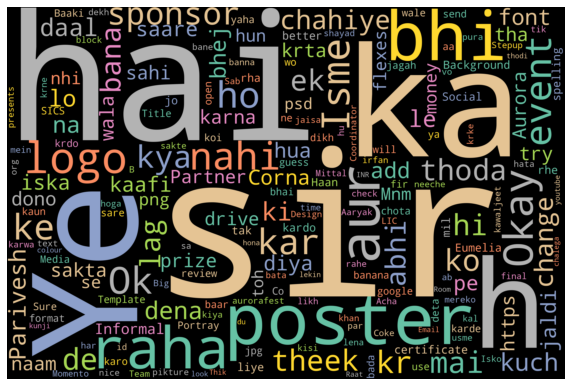

In [121]:
deleted_messages_df = df[df['msg'] == ' This message was deleted']
deleted_messages_df2= df[df['msg'] == ' You deleted this message']
media_messages_df = df[df['msg'] == ' <Media omitted>']
messages_df = df.drop(deleted_messages_df.index).drop(media_messages_df.index).drop(deleted_messages_df2.index)
text = " ".join(review for review in messages_df.msg)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False,stopwords = stopwords).generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="#000000").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<BR>
<BR>
    
### Wordcloud of most used words of each person

In [118]:
deleted_messages_df = df[df['msg'] == ' This message was deleted']
deleted_messages_df2= df[df['msg'] == ' You deleted this message']
media_messages_df = df[df['msg'] == ' <Media omitted>']
messages_df = df.drop(deleted_messages_df.index).drop(media_messages_df.index).drop(deleted_messages_df2.index)

Person Name Person2


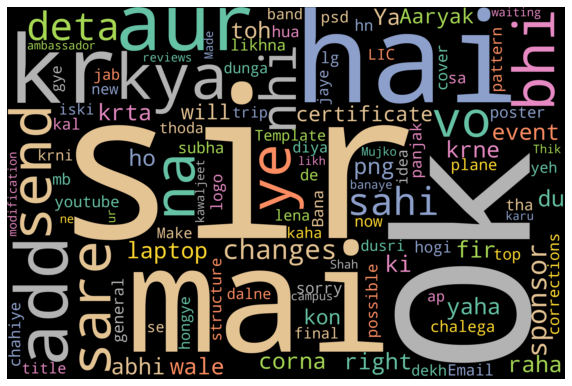

Person Name Person3


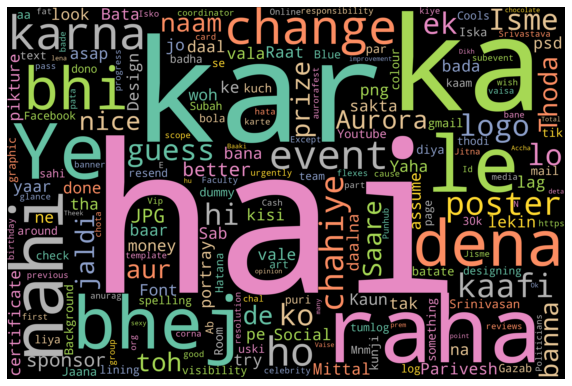

Person Name Person8


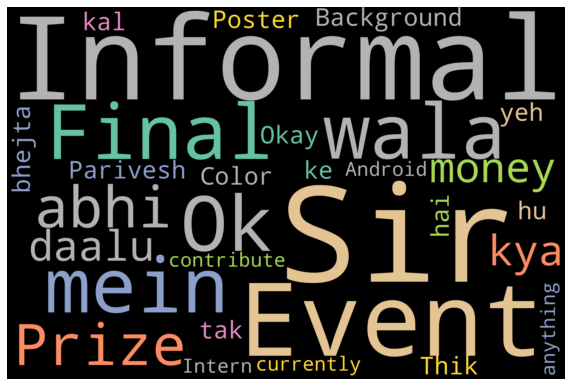

Person Name Person7


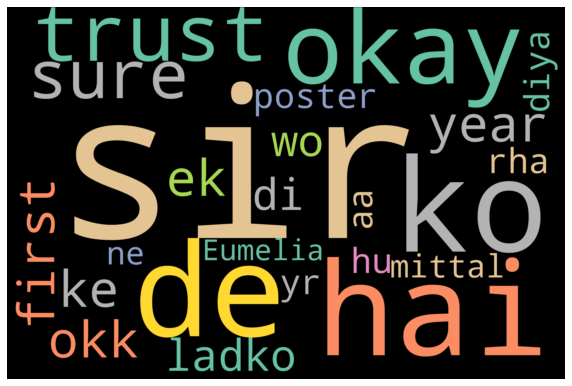

Person Name Person6


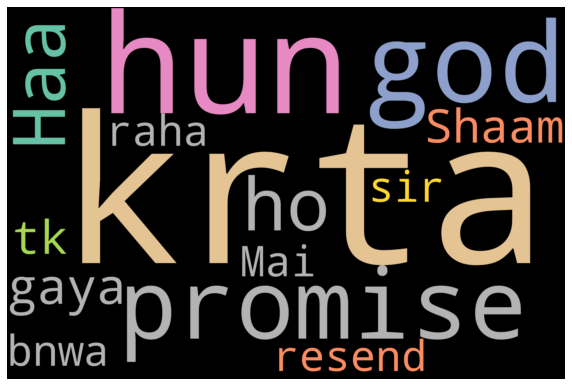

Person Name Person1


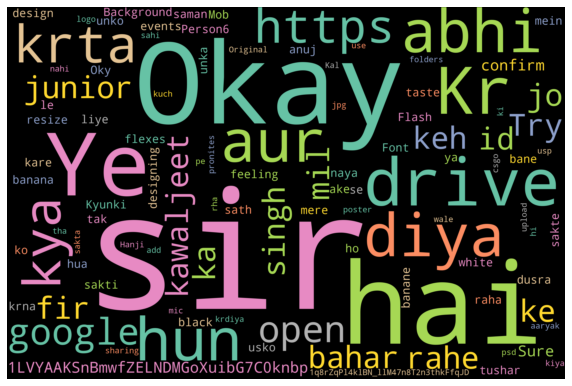

Person Name Person4


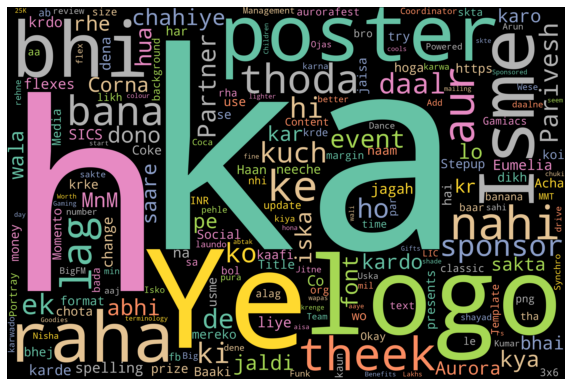

Person Name Person5


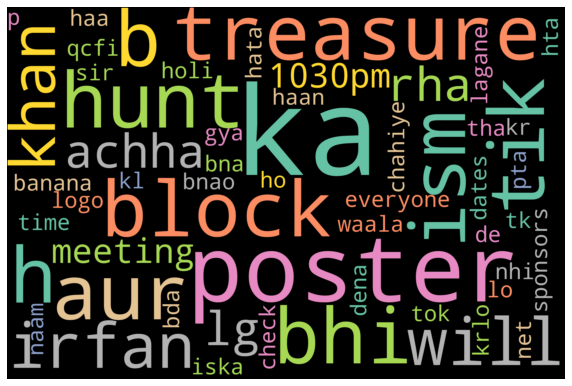

In [122]:
l = df.name.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['name'] == l[i]]
  text = " ".join(review for review in dummy_df.msg)
  stopwords = set(STOPWORDS)
  print('Person Name',l[i])
  wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False,stopwords = stopwords).generate(text)
  #wordcloud = WordCloud(stopwords=stopwords, background_color="#000000").generate(text)   
  plt.figure( figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

<BR>
<BR>

### HeatMap of message sent per day per month 

Text(0.5, 1, 'HeatMap of message sent per day per month ')

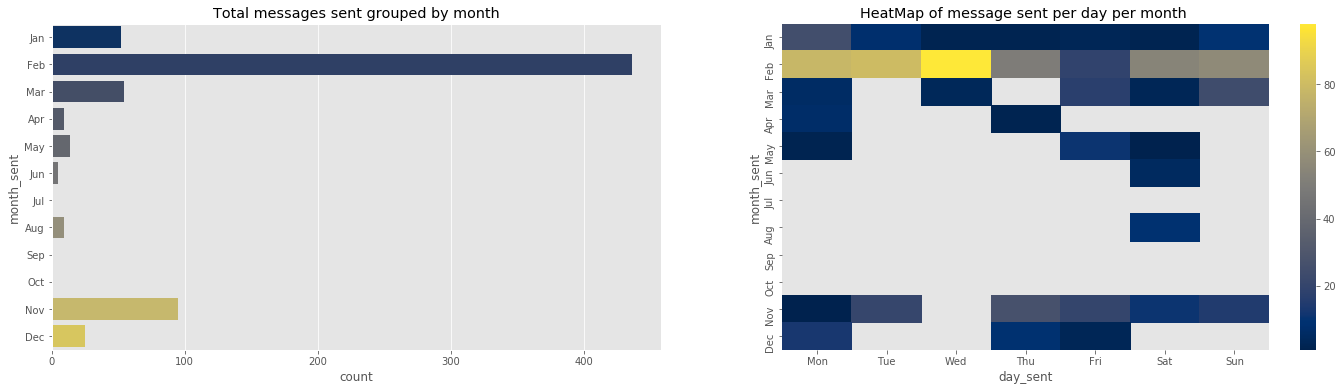

In [51]:
fig, axs = plt.subplots(ncols = 2, figsize = (24, 6))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
grouped_by_month = df.groupby('month_sent').sum().reset_index().sort_values(by = 'count', ascending = False)
sns.barplot(x = 'count', y = 'month_sent', data = grouped_by_month, order = months, ax = axs[0], palette = sns.color_palette('cividis', 12))
axs[0].set_title('Total messages sent grouped by month')

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
grouped_by_month_and_day = df.groupby(['month_sent', 'day_sent']).sum().reset_index()[['month_sent', 'day_sent', 'count']]
pt = grouped_by_month_and_day.pivot_table(index = 'month_sent', columns = 'day_sent', values = 'count').reindex(index = months, columns = days)
sns.heatmap(pt, cmap = 'cividis', ax = axs[1])
axs[1].set_title('HeatMap of message sent per day per month ')


<BR>
<BR>

### Most active Hours of Day & Most active days of Week

Text(0.5, 1.0, 'Most Active Hours')

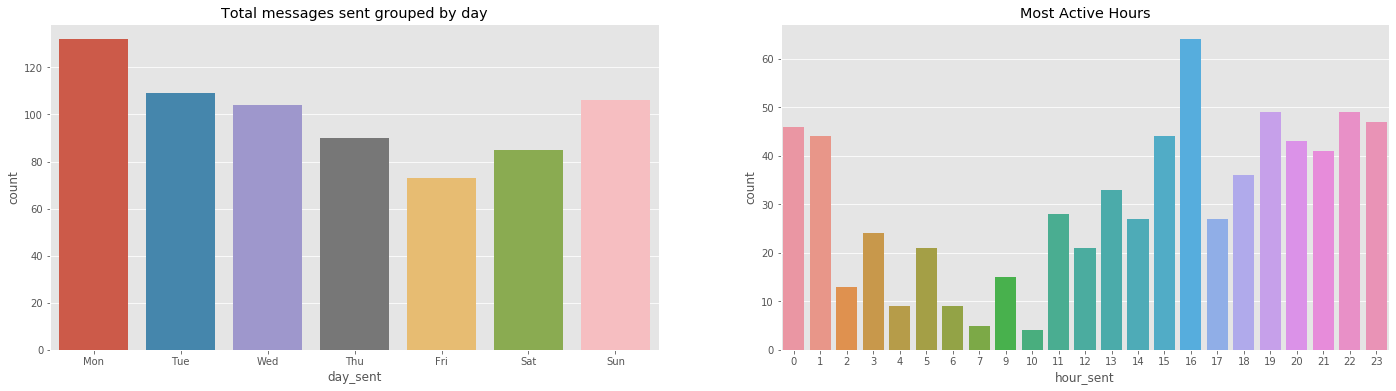

In [52]:
fig, axs = plt.subplots(ncols = 2, figsize = (24, 6))
grouped_by_day = df.groupby('day_sent').sum().reset_index()[['day_sent', 'count']]
sns.barplot(y = 'count', x = 'day_sent', data = grouped_by_day, order = days, ax = axs[0])
axs[0].set_title('Total messages sent grouped by day')

df['hour_sent'] = df['datetime'].apply(lambda x: x.hour)
grouped_by_time = df.groupby('hour_sent').sum().reset_index().sort_values(by = 'count', ascending = False)
sns.barplot(y = 'count', x = 'hour_sent', data = grouped_by_time, ax = axs[1])
axs[1].set_title('Most Active Hours')


<BR>
<BR>

### Most Active Days

Text(0.5, 1.0, 'Most Active Days')

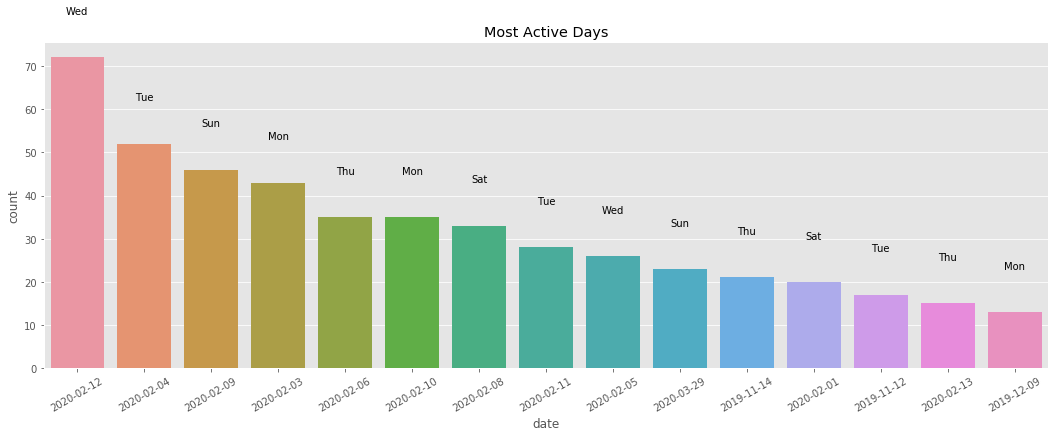

In [53]:
plt.figure(figsize = (18, 6))

grouped_by_date = df.groupby('date').sum().reset_index().sort_values(by = 'count', ascending = False).head(15)
grouped_by_date['day_sent'] = grouped_by_date['date'].apply(lambda x: x.strftime('%a'))
ax = sns.barplot(y = 'count', x = 'date', data = grouped_by_date)

for bar, label in zip(ax.patches, grouped_by_date['day_sent']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x + width/2., height + 10, label, ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most Active Days')


<BR>
<BR>

## SENTIMENT ANALYSIS


<BR>
<BR>

### Classifying Messages

In [54]:
posts = nltk.corpus.nps_chat.xml_posts()

def extract_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

fposts = [(extract_features(p.text), p.get('class')) for p in posts]
test_size = int(len(fposts) * 0.1)
train_set, test_set = fposts[test_size:], fposts[:test_size]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [132]:
classifier.classify(extract_features("I agree"))

'Accept'

In [55]:
ppl_cat= {}
for key, val in ppl.items():
    cat=[]
    for sent in val:
        cat.append(classifier.classify(extract_features(sent)))
        count = Counter(cat)
    ppl_cat[key] = count
    
df_class = pd.DataFrame.from_dict(ppl_cat, orient='index')
df_class

,Other,ynQuestion,Statement,Clarify,whQuestion,Reject,Accept,System,Emphasis,nAnswer,Greet,yAnswer,Continuer
Person2,40,23.0,33,4.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
Person3,5,8.0,58,7.0,3.0,NaN,NaN,7.0,1.0,4.0,1.0,NaN,NaN
Person8,7,2.0,7,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN
Person7,8,1.0,11,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Person6,15,NaN,6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Person1,137,4.0,47,5.0,1.0,1.0,NaN,NaN,6.0,NaN,1.0,6.0,NaN
Person4,20,19.0,136,12.0,1.0,9.0,NaN,5.0,NaN,4.0,10.0,NaN,3.0
Person5,1,2.0,16,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN


<BR>
<BR>

In [56]:
#Normalised data
df_class = df_class.div(df_class.sum(axis=1), axis=0).round(3)
df_class

,Other,ynQuestion,Statement,Clarify,whQuestion,Reject,Accept,System,Emphasis,nAnswer,Greet,yAnswer,Continuer
Person2,0.377,0.217,0.311,0.038,0.028,0.009,0.019,NaN,NaN,NaN,NaN,NaN,NaN
Person3,0.053,0.085,0.617,0.074,0.032,NaN,NaN,0.074,0.011,0.043,0.011,NaN,NaN
Person8,0.350,0.100,0.350,NaN,0.050,NaN,NaN,0.050,NaN,0.050,NaN,0.050,NaN
Person7,0.364,0.045,0.500,0.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Person6,0.625,NaN,0.250,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Person1,0.659,0.019,0.226,0.024,0.005,0.005,NaN,NaN,0.029,NaN,0.005,0.029,NaN
Person4,0.091,0.087,0.621,0.055,0.005,0.041,NaN,0.023,NaN,0.018,0.046,NaN,0.014
Person5,0.045,0.091,0.727,NaN,NaN,0.045,NaN,0.045,NaN,NaN,0.045,NaN,NaN


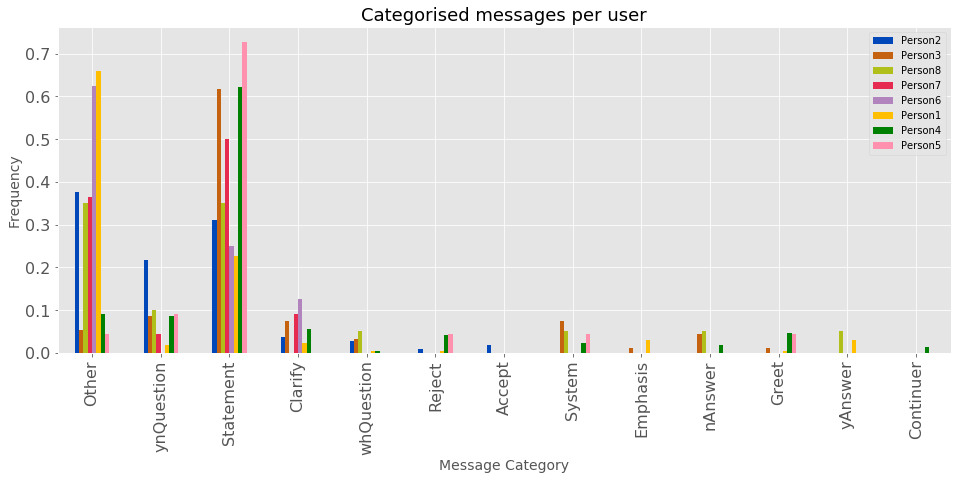

In [57]:
ax = df_class.T.plot(kind='bar', figsize=(16, 6), legend=True,
               fontsize=16, color=colors)
ax.set_title("Categorised messages per user", fontsize= 18)
ax.set_xlabel("Message Category", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
plt.show()

<BR>
<BR>

### Lexical Diversity

In [58]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

for key, value in ppl.items():
    wrds=[]
    for line in ppl[key]:
        words = nltk.word_tokenize(line)
        wrds.extend(words)

    tagged = nltk.pos_tag(wrds, tagset='universal' )
    print("{}'s lexical diversity: {} \n".format(key, lexical_diversity(tagged)))

Person2's lexical diversity: 0.3787878787878788 

Person3's lexical diversity: 0.644808743169399 

Person8's lexical diversity: 0.6067415730337079 

Person7's lexical diversity: 0.5777777777777777 

Person6's lexical diversity: 0.2872340425531915 

Person1's lexical diversity: 0.17295980511571254 

Person4's lexical diversity: 0.5165003837298542 

Person5's lexical diversity: 0.8089887640449438 



<BR>
<BR>

### Offensive Language

Text(0.5, 1.0, 'Percentage of messages that contain abusive words per user')

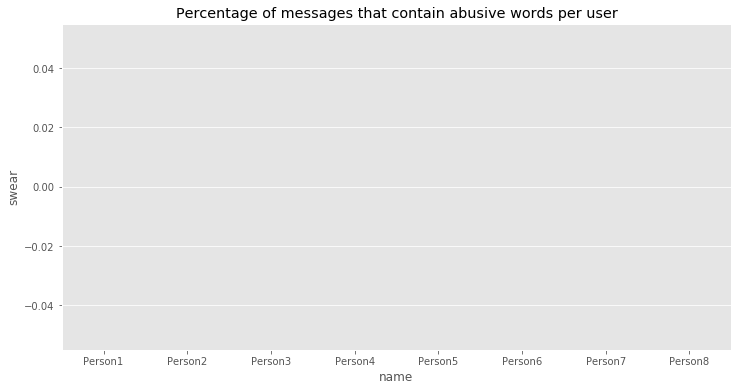

In [133]:
df['swear'] = df['msg'].apply(lambda x: sum(predict([x]))) 
df.head()
plt.figure(figsize = (12, 6))
avg_swear_scores = df.groupby('name').mean().sort_values(by = 'swear', ascending = False)['swear'].reset_index()
sns.barplot(x = 'name', y = 'swear', data = avg_swear_scores, palette = getColors(avg_swear_scores['name']))
plt.title('Percentage of messages that contain abusive words per user')


<BR>
<BR>

### Sentiment Score obtained using VADER

Text(0.5, 1.0, 'Average VADER sentiment score')

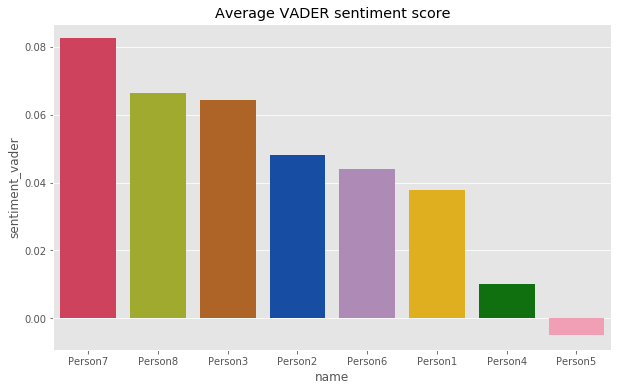

In [142]:
fig, axs = plt.subplots(figsize = (10, 6))

sid = SentimentIntensityAnalyzer()
df['sentiment_vader'] = df['msg'].apply(lambda x: sid.polarity_scores(x)['compound'])
grouped_by_name = df.groupby('name').mean().reset_index().sort_values(by = 'sentiment_vader', ascending = False)
sns.barplot(x = 'name', y = 'sentiment_vader', data = grouped_by_name, palette = getColors(grouped_by_name['name']), ax = axs)
axs.set_title('Average VADER sentiment score')



<BR>
<BR>

### Sentiment score obtained using TextBlob 

Text(0.5, 1.0, 'Average TextBlob sentiment score')

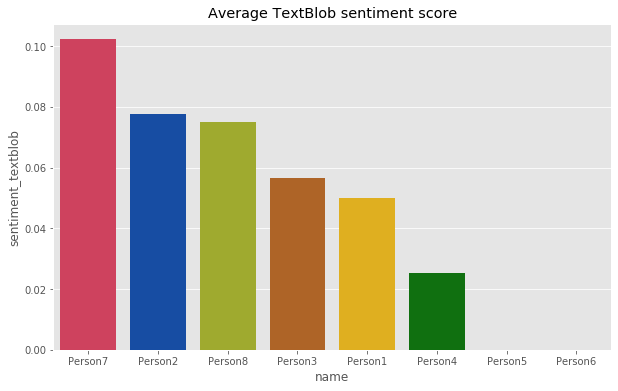

In [143]:
fig, axs = plt.subplots(figsize = (10, 6))

df['sentiment_textblob'] = df['msg'].apply(lambda x: TextBlob(x).sentiment.polarity)
grouped_by_name = df.groupby('name').mean().reset_index().sort_values(by = 'sentiment_textblob', ascending = False)
sns.barplot(x = 'name', y = 'sentiment_textblob', data = grouped_by_name, palette = getColors(grouped_by_name['name']), ax = axs)
axs.set_title('Average TextBlob sentiment score')

<BR>
<BR>

### Messages with most +ve Sentiment according to TextBlob

In [144]:
df.sort_values(by = 'sentiment_textblob', ascending = False)[['name', 'msg', 'sentiment_vader', 'sentiment_textblob']].head(10)

,name,msg,sentiment_vader,sentiment_textblob
698,Person1,Sure!!,0.4374,0.78125
658,Person1,Sure!!,0.4374,0.78125
254,Person3,Looks good,0.4404,0.70000
537,Person3,Jisme scope of improvement hai woh point out kar deta hu... Vaise these are nice,0.7003,0.60000
96,Person3,Poster is nice... Lekin art portray nahi ho raha sahi se,0.0000,0.60000
642,Person3,Design is nice,0.4215,0.60000
357,Person1,Okay sir,0.2263,0.50000
293,Person2,Ok sir,0.2960,0.50000
286,Person2,Ok,0.2960,0.50000
276,Person1,Okay sir,0.2263,0.50000


<BR>
<BR>

### Messages with most +ve Sentiment according to VADER

In [145]:
df.sort_values(by = 'sentiment_vader', ascending = False)[['name', 'msg', 'sentiment_vader', 'sentiment_textblob']].head(10)

,name,msg,sentiment_vader,sentiment_textblob
490,Person4,A token representing our earnest and ardent gratitude for honouring us with your presence,0.9153,0.0
143,Person4,Prize Money wale poster me Gamiacs ka prize money update krdo,0.7650,0.0
61,Person4,"Har poster me prize money ka format *INR 1.2 Lakhs + Goodies, Benefits and Sponsored Gifts* ais...",0.7096,0.0
537,Person3,Jisme scope of improvement hai woh point out kar deta hu... Vaise these are nice,0.7003,0.6
619,Person3,Design better ho sakta hai kaafi... Vector better mil jaayega,0.7003,0.5
374,Person4,"Iska creative kuch bhi use karo, not restricted to circle wala logo",0.6229,0.5
704,Person6,god promise,0.5267,0.0
539,Person3,Baaki Saare sexy hai,0.5267,0.5
664,Person6,god promise,0.5267,0.0
211,Person3,Isme celebrity vala part hata kar 2000 ka prize money daalna hai,0.5106,0.0


<BR>
<BR>

### Messages with most -ve Sentiment according to TextBlob

In [146]:
df.sort_values(by = 'sentiment_textblob', ascending = True)[['name', 'msg', 'sentiment_vader', 'sentiment_textblob']].head(10)

,name,msg,sentiment_vader,sentiment_textblob
325,Person1,Sir tushar aur Person6 mere sath hai aur anuj abhi bahar hai,0.0000,-0.500000
231,Person2,sorry panjak likhna tha,-0.0772,-0.500000
330,Person4,Cleanliness & Waste Management,-0.4215,-0.200000
361,Person1,Sir black me kr sakte hai kya usko,0.0000,-0.166667
134,Person3,Thoda responsibility le lo... I guess Mittal ne hi previous kaafi kiye hai,0.0000,-0.166667
3,Person2,@918369616043 sir vo youtube cover ki psd 128 mb ki hai yaha send nhi hogi toh png de du chale...,0.0000,0.000000
433,Person4,Baaki bhi daal do usme,0.0000,0.000000
434,Person1,Sir pronites wale poster ka psd mil sakta hai,0.0000,0.000000
435,Person4,Mavi ko message kar de,0.0000,0.000000
436,Person1,<Media omitted>,0.0000,0.000000


<BR>
<BR>

### Messages with most -ve Sentiment according to VADER

In [147]:
df.sort_values(by = 'sentiment_vader', ascending = True)[['name', 'msg', 'sentiment_vader', 'sentiment_textblob']].head(10)

,name,msg,sentiment_vader,sentiment_textblob
155,Person5,meeting b block 1030pm B block,-0.7003,0.0
386,Person4,"Event flexes, pehle saare 3*6 ban rahe the, abhi corna parivesh 2*6 kardo",-0.5574,0.0
512,Person4,1100 ko sab B block,-0.4404,0.0
330,Person4,Cleanliness & Waste Management,-0.4215,-0.2
410,Person4,Posters theek lag rhe saare👍,-0.3400,0.0
59,Person3,Gazab lag raha... Aurora 20 ho raha hai lekin.. Aur uski visibility thodi badha de,-0.3400,0.0
24,Person4,"Isme fonts ka kuch ho sakta to theek, otherwise theek lag rha",-0.3400,0.0
251,Person4,Ye theek lag raha,-0.3400,0.0
501,Person4,Mereko theek lag raha,-0.3400,0.0
676,Person4,Acha lag raha🙌,-0.3400,0.0
